In [221]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [222]:
train_df = pd.read_csv('Final_Train_Dataset.csv')
test_df = pd.read_csv('Final_Test_Dataset.csv')

In [223]:
train_df.shape

(19802, 9)

In [224]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 9 columns):
Unnamed: 0              19802 non-null int64
experience              19802 non-null object
job_description         15384 non-null object
job_desig               19802 non-null object
job_type                4797 non-null object
key_skills              19801 non-null object
location                19802 non-null object
salary                  19802 non-null object
company_name_encoded    19802 non-null int64
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [225]:
train_df.tail()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
19797,19797,12-18 yrs,NaN,"Director, Medical Coding Training",NaN,"Medical Coding, ICD - 10, US Healthcare, RCM, ...",Hyderabad,15to25,2245
19798,19798,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, part time, home base, work fr...","Mumbai, Bengaluru, Chennai, Hyderabad, Dehradu...",0to3,4966
19799,19799,8-13 yrs,Annuities Domain experience is mandatory;Work ...,PM- C#/ .Net ( Annuity/ Insurance Domain),NaN,"SQL Server, VB.NET, C#, .Net, C#.Net, Oracle S...",Hyderabad,15to25,4272
19800,19800,1-3 yrs,- By plugging into our market-leading global n...,Consultant - Internal Audit,NaN,"accounting, internal audit, auditing, risk adv...",Pune,10to15,1793
19801,19801,2-5 yrs,- 3-5 years experience with the end to end pro...,Unity 3D Developer - Mobile Games Development,NaN,"IOS, XCode, Apple, Version Control, Perforce, ...",Hyderabad,10to15,1349


In [226]:
train_df['salary'].value_counts()

10to15    4500
15to25    4125
6to10     3533
0to3      3245
3to6      2824
25to50    1575
Name: salary, dtype: int64

In [227]:
train_df['exp'] = train_df['experience'].str.rstrip('yrs')
train_df['min_exp'] = train_df['exp'].str.split('-').str[0].astype(int)
train_df['max_exp'] = train_df['exp'].str.split('-').str[1].astype(int)
train_df['avg_exp'] = train_df['min_exp'] + train_df['max_exp']/2

In [228]:
train_df['skill1'] = train_df['key_skills'].str.split(',').str[0]
#train_df['skill2'] = train_df['key_skills'].str.split(',').str[1]
#train_df['skill3'] = train_df['key_skills'].str.split(',').str[2]
#train_df['skill4'] = train_df['key_skills'].str.split(',').str[3]
#train_df['skill5'] = train_df['key_skills'].str.split(',').str[4]

In [229]:
train_df.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,exp,min_exp,max_exp,avg_exp,skill1
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,5-7,5,7,8.5,team skills
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,10-17,10,17,18.5,ppc
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195,5-9,5,9,9.5,HR Analytics
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313,7-10,7,10,12.0,SQL
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305,1-3,1,3,2.5,accounting


In [230]:
test_df.shape, train_df.shape

((6601, 7), (19802, 14))

In [231]:
train_df['max_exp'].value_counts()

5     2912
8     2250
10    2202
6     1978
7     1745
12    1293
4     1148
9     1090
3     1060
15     699
2      609
13     574
11     508
20     349
14     320
1      298
18     223
0      151
16     124
25      74
17      71
22      60
19      15
23      15
24      12
21      10
30       7
26       3
28       2
Name: max_exp, dtype: int64

In [232]:
train_df['min_exp'].value_counts()

2     3196
3     2713
5     2330
1     2266
4     1911
0     1653
8     1253
10    1139
7     1077
6     1060
12     362
9      323
15     205
11     119
13      90
14      55
18      21
20      13
17       6
16       6
19       3
23       1
Name: min_exp, dtype: int64

In [233]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
experience              6601 non-null object
job_description         5079 non-null object
job_desig               6601 non-null object
job_type                1637 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
dtypes: int64(1), object(6)
memory usage: 361.1+ KB


In [234]:
X_train = train_df.drop(columns=['Unnamed: 0','job_description','key_skills','experience','exp','avg_exp','max_exp'])
X_train = X_train.fillna(value='')

In [235]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 7 columns):
job_desig               19802 non-null object
job_type                19802 non-null object
location                19802 non-null object
salary                  19802 non-null object
company_name_encoded    19802 non-null int64
min_exp                 19802 non-null int32
skill1                  19802 non-null object
dtypes: int32(1), int64(1), object(5)
memory usage: 1005.6+ KB


In [236]:
labelenc = LabelEncoder()
X_train = X_train.apply(labelenc.fit_transform)

In [237]:
X_train[0:10]

,job_desig,job_type,location,salary,company_name_encoded,min_exp,skill1
0,9104,0,597,5,3687,5,3929
1,4395,0,1412,1,458,10,3514
2,3058,3,525,2,4195,5,979
3,1087,3,114,1,313,7,2000
4,10385,0,811,4,1305,1,2473
5,9583,0,1229,5,4428,5,2469
6,1149,3,525,3,1988,13,889
7,6025,0,1301,5,1793,6,70
8,7236,0,11,0,3398,1,2984
9,8076,0,180,2,3444,2,2477


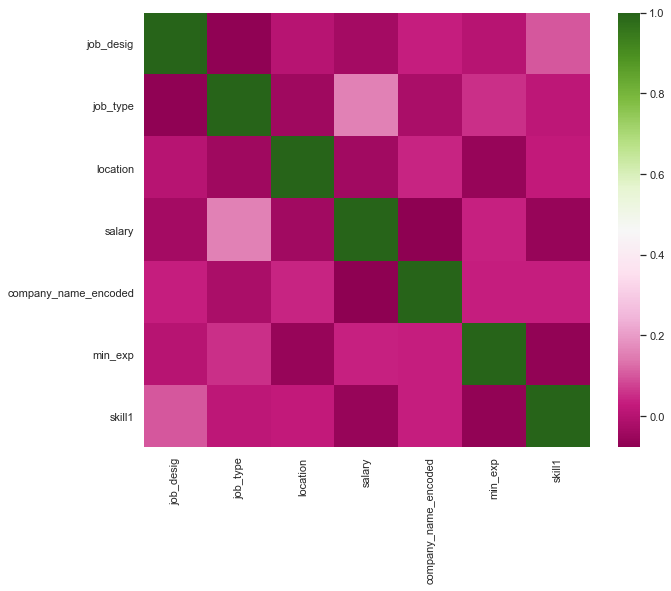

In [238]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), cmap="PiYG");

In [239]:
y_train = X_train['salary']

In [240]:
y_train.head()

0    5
1    1
2    2
3    1
4    4
Name: salary, dtype: int64

In [241]:
X_train = X_train.drop(columns=['salary'])

In [242]:
X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, 
                     test_size=0.3, random_state=17)

In [243]:
X_train.columns

Index(['job_desig', 'job_type', 'location', 'company_name_encoded', 'min_exp',
       'skill1'],
      dtype='object')

In [244]:
X_train_part.shape, y_train_part.shape, X_valid.shape

((13861, 6), (13861,), (5941, 6))

In [245]:
y_train_part.head()

994      3
5800     5
807      2
11167    1
19673    0
Name: salary, dtype: int64

In [246]:
dtree = DecisionTreeClassifier( random_state = 17)
dtree.fit(X_train_part, y_train_part)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [247]:
y_pred = dtree.predict(X_valid)
accu1 = accuracy_score(y_valid, y_pred)
print(accu1)

0.3258710654771924


In [248]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score

params = {'max_depth': np.arange(2, 11), 'max_features': np.arange(3, 7)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
cv_dtree = GridSearchCV(estimator=dtree, param_grid=params, cv=skf, verbose=1)

In [249]:
cv_dtree.fit(X_train_part, y_train_part)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    7.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': array([3, 4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [250]:
cv_score = cross_val_score(estimator=cv_dtree, X=X_train_part, y=y_train_part, cv=skf)
print(cv_score)
print(cv_score.mean())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    6.3s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    6.1s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    6.4s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    6.6s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[0.42162162 0.39307609 0.3968254  0.41320823 0.41299639]
0.4075455454583058


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    6.5s finished


In [251]:
cv_dtree.fit(X_train, y_train)
print( cv_dtree.best_params_ )
print( cv_dtree.best_estimator_ )
print( 'Best score by CV: ', cv_dtree.best_score_ )
cv_y_pred = cv_dtree.predict(X_valid)
accu2 = accuracy_score(y_valid, cv_y_pred)
print("Validation Set Accuracy after hyperparam tuning (Depth=2 to 10): %.2f%%" % (accu2 * 100.0))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 7, 'max_features': 6}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')
Best score by CV:  0.41662458337541664
Validation Set Accuracy after hyperparam tuning (Depth=2 to 10): 43.36%


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   10.4s finished


In [252]:
cv_y_pred

array([1, 1, 2, ..., 2, 0, 2], dtype=int64)

In [253]:
cv_dtree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [254]:
test_df['exp'] = test_df['experience'].str.rstrip('yrs')
test_df['min_exp'] = test_df['exp'].str.split('-').str[0].astype(int)
#test_df['max_exp'] = test_df['exp'].str.split('-').str[1].astype(int)
#test_df['avg_exp'] = test_df['min_exp'] + test_df['max_exp']/2

In [255]:
test_df['skill1'] = test_df['key_skills'].str.split(',').str[0]
#test_df['skill2'] = test_df['key_skills'].str.split(',').str[1]
#test_df['skill3'] = test_df['key_skills'].str.split(',').str[2]
#test_df['skill4'] = test_df['key_skills'].str.split(',').str[3]
#test_df['skill5'] = test_df['key_skills'].str.split(',').str[4]

In [256]:
test_df.head()

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded,exp,min_exp,skill1
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,7-12,7,Java
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629,0-5,0,Medical Billing
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,3-6,3,Oracle Sales
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711,0-3,0,offline
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40,0-5,0,voice support


In [257]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 10 columns):
experience              6601 non-null object
job_description         5079 non-null object
job_desig               6601 non-null object
job_type                1637 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
exp                     6601 non-null object
min_exp                 6601 non-null int32
skill1                  6601 non-null object
dtypes: int32(1), int64(1), object(8)
memory usage: 490.0+ KB


In [258]:
X_test = test_df.drop(columns = ['job_description','key_skills','experience','exp'])
X_test = X_test.fillna(value='')

In [259]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 6 columns):
job_desig               6601 non-null object
job_type                6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
min_exp                 6601 non-null int32
skill1                  6601 non-null object
dtypes: int32(1), int64(1), object(4)
memory usage: 283.7+ KB


In [260]:
X_test = X_test.apply(labelenc.fit_transform)

In [261]:
y_pred = cv_dtree.predict(X_test)

In [262]:
y_pred.shape

(6601,)

In [263]:
y_pred[0:5]

array([2, 0, 1, 0, 0], dtype=int64)

In [264]:
#convert the predictions into file format as required for submission
def predictionstofile( y_pred, filename ):
    #convert series to dataframe
    df = pd.DataFrame(y_pred)
    df.columns = ['sal']
    
    #not the best way, but mapping it back to string so as to be able to make a submission
    df['sal'] = df['sal'].astype(str)
    vals_to_replace = {'0':'0to3', '1':'10to15', '2':'15to25', '3':'25to50', '4':'3to6', '5':'6to10'}
    df['salary'] = df['sal'].map(vals_to_replace)
    
    df = df.drop(columns=['sal'])
    df.to_csv(filename)
    return

In [265]:
predictionstofile(y_pred, 'sub10dt.csv')

In [266]:
X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, test_size=0.3, random_state=17)

In [267]:
X_train_part.head()

,job_desig,job_type,location,company_name_encoded,min_exp,skill1
994,7943,3,525,1353,3,644
5800,10988,0,1027,2491,7,3128
807,5611,0,114,5032,8,1174
11167,6238,0,811,2550,6,588
19673,5153,0,811,3055,0,2778


In [268]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
logit = LogisticRegression(random_state=17, class_weight='balanced', max_iter=500)

logit_pipe = Pipeline([('scaler', scaler), ('logit', logit)])
logit_pipe_params = {'logit__C': np.logspace(-8, 8, 17)}

In [269]:
pipeline_cv = GridSearchCV(estimator=logit_pipe, param_grid=logit_pipe_params, cv=skf, verbose=1)
cv_score = cross_val_score(estimator=pipeline_cv, X= X_train_part, y=y_train_part, cv=skf)
print(cv_score)
print(cv_score.max(), cv_score.mean())

pipeline_cv.fit(X_train, y_train)
pipeline_cv.score
pipeline_cv.best_estimator_, pipeline_cv.best_params_, pipeline_cv.best_score_

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    5.0s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    5.1s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    5.2s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    5.2s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    5.2s finished


[0.40828829 0.38189686 0.37914863 0.38505955 0.37689531]
0.4082882882882883 0.38625772643806205
Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    8.9s finished


(Pipeline(memory=None,
      steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logit', LogisticRegression(C=100.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=500,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=17,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
 {'logit__C': 100.0},
 0.38677911322088676)

In [270]:
y_pred_pp = pipeline_cv.predict(X_test)
predictionstofile( y_pred_pp, 'sub10lr.csv')

In [271]:
y_pred_pp[100:110]

array([5, 5, 1, 0, 4, 4, 1, 0, 3, 3], dtype=int64)

In [272]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

mnb = MultinomialNB()
mnb.fit(X_train_part, y_train_part)

mnb_y_pred = mnb.predict(X_valid)
accu2 = accuracy_score(y_valid, mnb_y_pred)
print(accu2)

#mnb_pipe = Pipeline([('scaler', scaler), ('mnb', mnb)])
mnb_params = {'alpha': np.arange(0.1, 2, 0.1) }

0.17539134825786903


In [273]:
gnb = GaussianNB()
gnb.fit(X_train_part, y_train_part)

gnb_y_pred = gnb.predict(X_valid)
accu2 = accuracy_score(y_valid, gnb_y_pred)
print(accu2)

0.373506143746844


In [274]:
mnb_cv = GridSearchCV(estimator=gnb,param_grid={}, cv=skf, verbose=1)
#mnb_cv = GridSearchCV(estimator=gnb, param_grid=mnb_params, cv=skf, verbose=1)
cv_score = cross_val_score(estimator=mnb_cv, X=X_train_part, y=y_train_part, cv=skf)
print(cv_score)
print(cv_score.max(), cv_score.mean())

mnb_cv.fit(X_train, y_train)
mnb_cv.score
mnb_cv.best_estimator_, mnb_cv.best_params_, mnb_cv.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[0.39783784 0.38838803 0.37554113 0.38361602 0.37184116]
0.3978378378378378 0.3834448338234232
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(GaussianNB(priors=None), {}, 0.3840521159478841)

In [275]:
gnb_y_pred

array([5, 5, 2, ..., 1, 0, 3], dtype=int64)

In [276]:
gnb_pred_pp = mnb_cv.predict(X_test)
predictionstofile( y_pred_pp, 'gnb10.csv')

## Results until now
 
23/1 - Decision tree has given results only for an accuracy of 0.40 - on submission, gave only 0.248 score on the leaderboard.
Let us try other options.
 
24/1 - Added another feature back - job type. Accuracy of 0.414 gave score of 0.276
 
25/1 - Split up experience as min and max experience. Accuracy of 0.4256640743359257. Score = 0.374034237

 ### Iter 4 - Pipeline (scaler+log regression) giving 0.3885971114028886 accuracy and a submission score of 0.389183457

Iter 5 - 5 skills and decision tree, CV score = 0.41834158165841834; submission score = 0.385093168 

Iter 6 - 5 skills and LR, CV score = 0.3907686092313908; submission score = 0.386305105

Iter 7 - 3skills decision tree, cv score = 0.417988082011918, submission score = 0.372519315
 
    7a -     dropping max_exp, cv score = 0.40985759014240986, submission score = 0.378579003

Iter 8 - 3skills log regression, cv score = 0.3882436117563882, submission score = 0.384790183
 
    8a -     dropping max_exp, cv score = 0.3852136147863852, submission score = 0.380548402
    8b -     only 1 skill, cv score = 0.38677911322088676, submission score = 0.

9 - 
dtree 0.42283607716392285, 0.378124527
 
LR 0.3908191091808908, 0.386305105

Random Forest

 cv = 0.4113725886274114, 0.378730495
 
 cv = 0.41455408544591454, 0.386608090 (n_estimators = 500)
 
 Gaussian NB: cv = 0.38794061205938796, score = 0.386305105
 
 10th Model:
 
 LR - cv = 0.38677911322088676, score = 0.380548402
 
 DT - cv = 0.41662458337541664, score = 0.369640963

 Gaussian NB - cv = 0.3840521159478841, score = 0.380548402


# Time Consuming, we do not want to run it. Marking it down

# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=17, n_estimators=500)
rf.fit(X_train_part, y_train_part)

y_pred = rf.predict(X_valid)
accu1 = accuracy_score(y_valid, y_pred)
print(accu1)

## .3543 with default
## 0.3728 with n_estimators=500

cv_rftree = GridSearchCV(estimator=rf, param_grid=params, cv=skf, verbose=1, n_jobs=4)

cv_rftree.fit(X_train_part, y_train_part)
cv_score = cross_val_score(estimator=cv_rftree, X=X_train_part, y=y_train_part, cv=skf)
print(cv_score)
print(cv_score.mean())

cv_rftree.fit(X_train, y_train)
print( cv_rftree.best_params_ )
print( cv_rftree.best_estimator_ )
print( 'Best score by CV: ', cv_rftree.best_score_ )
cv_y_pred = cv_rftree.predict(X_valid)
accu2 = accuracy_score(y_valid, cv_y_pred)
print("Random Forest: Validation Set Accuracy after hyperparam tuning (Depth=2 to 10): %.2f%%" % (accu2 * 100.0))


y_pred_rf = cv_rftree.predict(X_test)
predictionstofile( y_pred_rf, 'rf_sub2.csv')